Inventory summary:
          date  total_pieces  pieces_sold  pieces_returned  net_pieces
0   2023-04-01        329853       230059            19979      119773
1   2023-04-02        314037       219307            18772      113502
2   2023-04-03        352231       245895            21455      127791
3   2023-04-04        358942       248402            21927      132467
4   2023-04-05        337556       230578            21526      128504
..         ...           ...          ...              ...         ...
295 2024-01-21        317422       234197            16500       99725
296 2024-01-22        335759       246097            18004      107666
297 2024-01-23        312154       228627            16332       99859
298 2024-01-24        325667       238203            17394      104858
299 2024-01-25        310809       227010            16940      100739

[300 rows x 5 columns]
n\Warehouse Performance:
   warehouse  total_orders  avg_shipping_time  avg_delay_risk
0       W001      

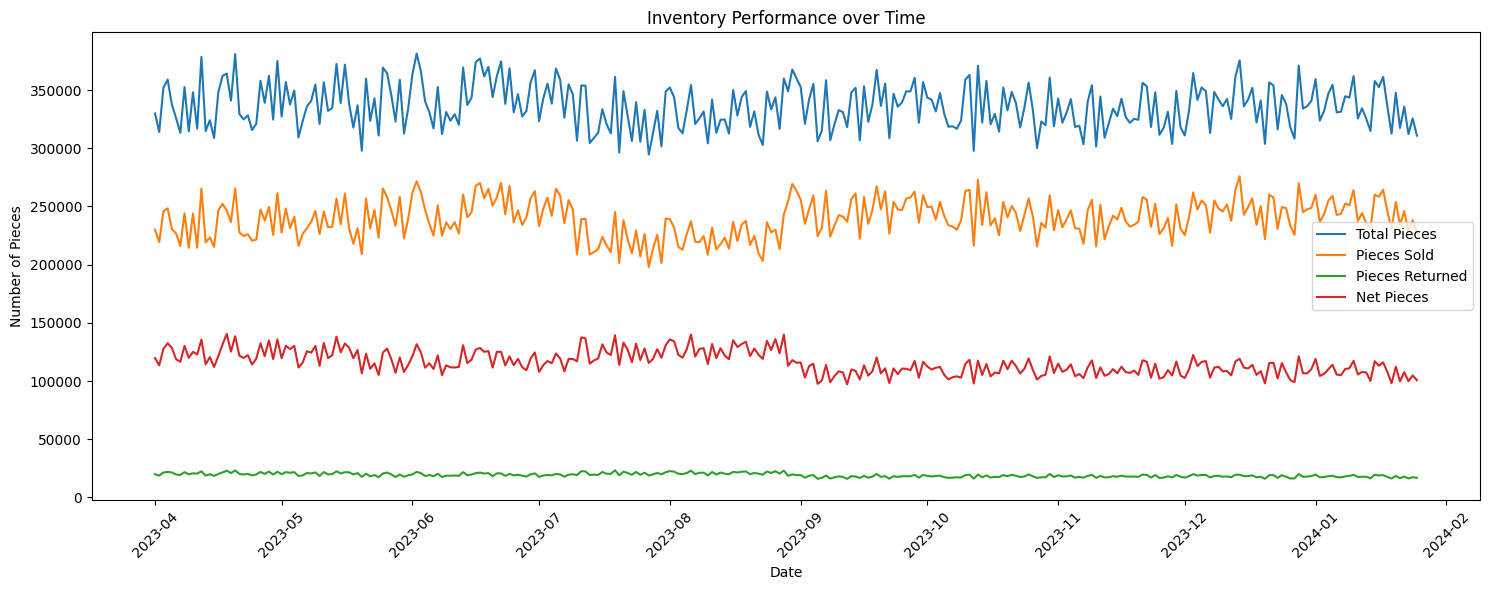

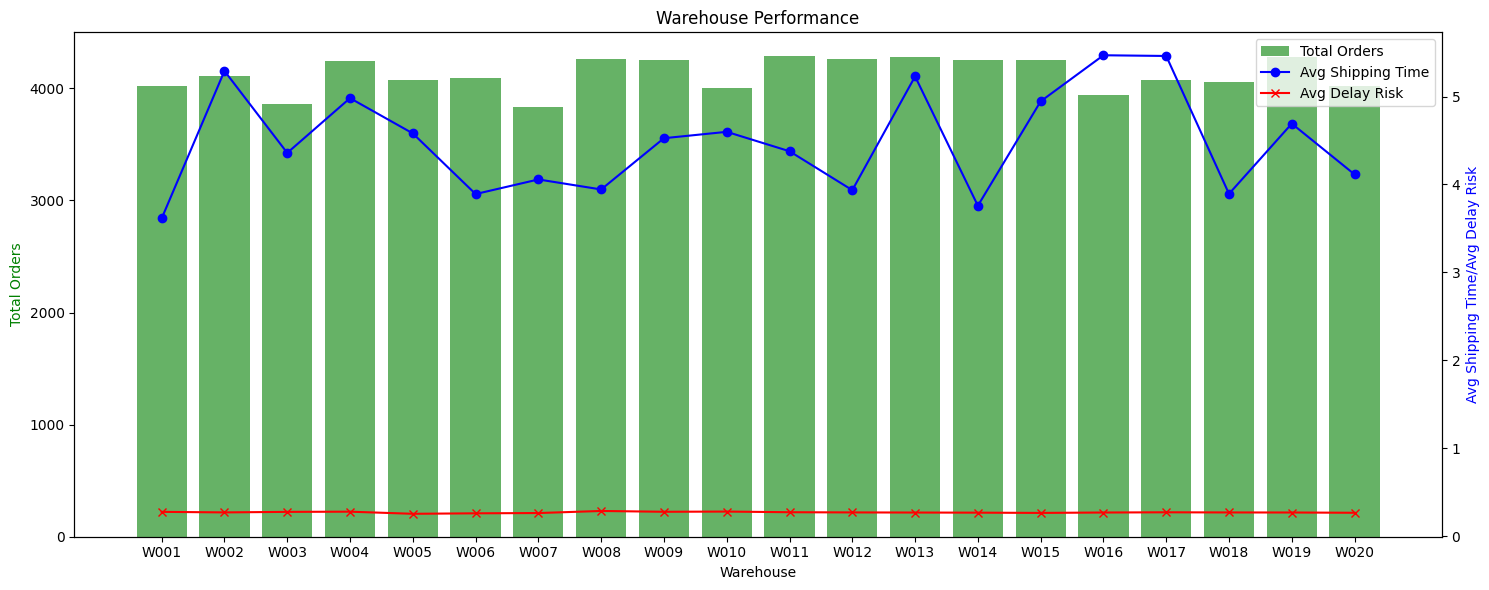

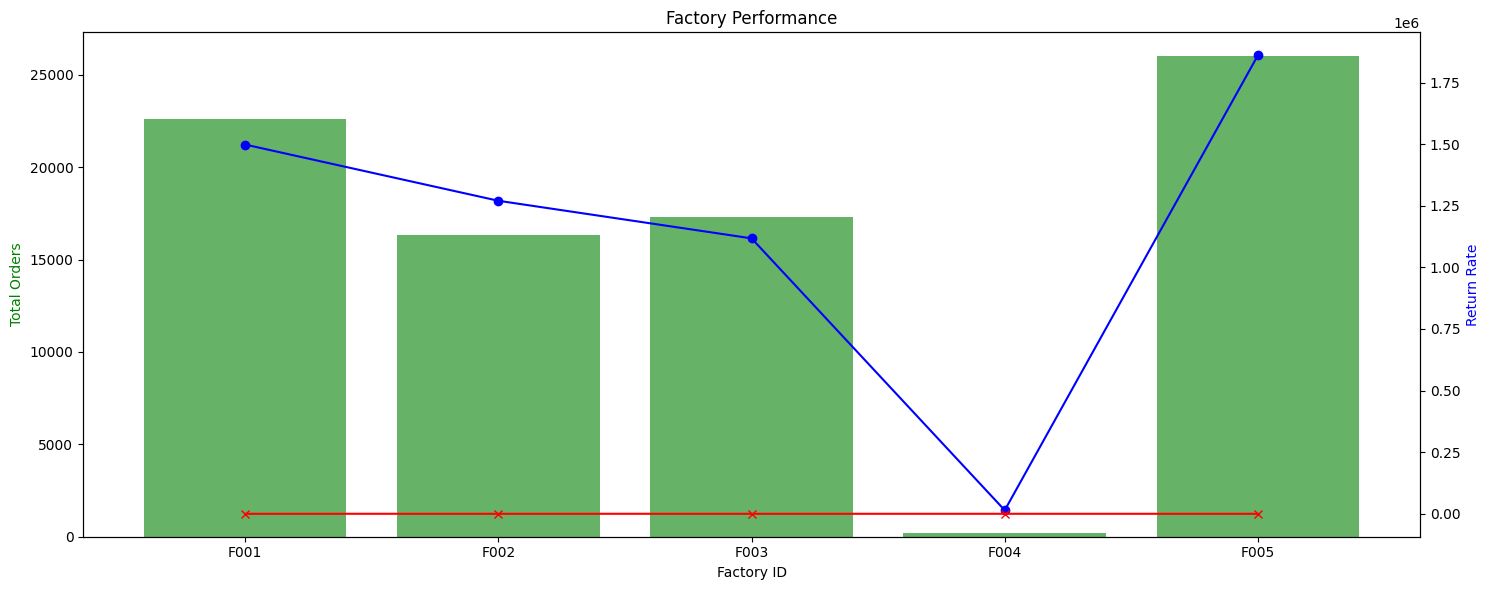

In [8]:
import pandas as pd      #import pandas library which is used for data manipulation and analysis
import matplotlib.pyplot as plt    #import matplotlib.pyplot module for creating visualizations
import matplotlib.dates as mdates  #import matplotlib.dates module for handling date formats in plots

#Load the csv file
file_path = r'C:\Users\ngocd\source\Github\Coding-projects_July2024\data\processed\merged_data.csv' #specifies the path to the csv file containing the data
data = pd.read_csv(file_path, parse_dates=['date'])     #read the csv file into a pandas DataFrame called data

#Number of pieces in relation to sales and returns, grouped by factory
data['net_pieces'] = data['total_pieces'] - data['pieces_sold'] + data['pieces_returned']
inventory_summary = data.groupby('date').agg({'total_pieces':'sum', 'pieces_sold':'sum', 'pieces_returned':'sum', 'net_pieces':'sum'}).reset_index()
#group the data by date and aggregates the total pieces, pieces sold, pieces returned, and net pieces for each date. The reset_index method converts the grouped data back into DataFrame

factory_performance = data.groupby('factory_id').agg(
    {'pieces_returned':'sum', 'order_id':'count'
     }).reset_index().rename(columns={'order_id':'total_orders','pieces_returned':'total_returns'})

#Calculate the return rates of factory by dividing the total returns by total orders
factory_performance['return_rate'] = factory_performance['total_returns']/factory_performance['total_orders']

#Evaluate performance of warehouses in terms of handling and process orders
warehouse_performance = data.groupby('warehouse').agg(
    {'order_id':'count', 'actual_shipping_time':'mean', 'delay_risk':'mean'
     }).reset_index().rename(columns={'order_id':'total_orders', 'actual_shipping_time':'avg_shipping_time', 'delay_risk':'avg_delay_risk'})
#Similar to above, group data by warehouse ID and aggregate data, then rename the columns to have more descriptive name 

#Print the results
print("Inventory summary:")
print(inventory_summary)
print("n\Warehouse Performance:")
print(warehouse_performance)
print("Factory Performance:")
print(factory_performance)

#Visualize
plt.figure(figsize=(15,6))   #crete a new figure with specified sizes
plt.plot(inventory_summary['date'], inventory_summary['total_pieces'], label = 'Total Pieces')  #plot the 'Total Pieces' by date and with a label
plt.plot(inventory_summary['date'], inventory_summary['pieces_sold'], label = 'Pieces Sold')    
plt.plot(inventory_summary['date'], inventory_summary['pieces_returned'], label = 'Pieces Returned')
plt.plot(inventory_summary['date'], inventory_summary['net_pieces'], label = 'Net Pieces')
plt.xlabel('Date')     #set the label for x-axis
plt.ylabel('Number of Pieces')    #set the label for y-axis
plt.title('Inventory Performance over Time')         #set the title for the plot
plt.legend()        #add a legend
plt.xticks(rotation=45)      #rotate label of x-axis to 45 degree for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())        #set the major ticks on the x-axis to be at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))        #format the x-axis labels to show year and month
plt.tight_layout()   #add the layout to prevent overlap
plt.show()        #display the plot

fig, ax1 = plt.subplots(figsize=(15,6))    #create a new figure and set a subplot with a specified size, a subplot is needed to manage multiple plots within the same figure (to compare or combine)
ax2 = ax1.twinx()  #create a second y-axis that shares the same x-axis as ax1 (to plot multiple data sets, for example: total orders (a count), avg shipping time(a duration) on DIFFERENT SCALES)
ax1.bar(warehouse_performance['warehouse'], warehouse_performance['total_orders'], color='g', alpha=0.6, label = 'Total Orders') #creat a bar plot for 'Total Orders'
ax2.plot(warehouse_performance['warehouse'], warehouse_performance['avg_shipping_time'], color='b', marker='o', label = 'Avg Shipping Time') #create line plot
ax2.plot(warehouse_performance['warehouse'], warehouse_performance['avg_delay_risk'], color='r', marker ='x', label ='Avg Delay Risk') #create line plot
ax1.set_xlabel('Warehouse')    #set the label for the x-axis
ax1.set_ylabel('Total Orders', color='g')  #set the label for y-axis on ax1
ax2.set_ylabel('Avg Shipping Time/Avg Delay Risk', color='b')   #set the label for y-axis on ax2
ax1.set_title('Warehouse Performance')  #set the title of the plot
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fix,ax1=plt.subplots(figsize=(15,6))
ax2=ax1.twinx()   #ax1 and ax2 are 2 variables representing axes objects. ax1 is the primary y-axis to plot the 1st set of data, ax2 is the secondary y-axis, same x-axis but for different scales
ax1.bar(factory_performance['factory_id'], factory_performance['total_orders'], color='g', alpha=0.6, label='Total Orders')
ax2.plot(factory_performance['factory_id'], factory_performance['total_returns'], color='b', marker='o', label='Total Returns')
ax2.plot(factory_performance['factory_id'], factory_performance['return_rate'], color ='r', marker='x', label='Return Rate')
ax1.set_xlabel('Factory ID')
ax1.set_ylabel('Total Orders', color='g')
ax2.set_ylabel('Return Rate', color='b')
ax1.set_title('Factory Performance')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes) #bbox_transform ensures legend's position is relative to the axes, not figure or the data coordinates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()